<a href="https://colab.research.google.com/github/Juosorioca420/DiscretasII/blob/main/Tarea7/Lagrange_4cuadrados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### El teorema de los cuatro cuadrados de Lagrange

---

Se desea descomponer un entero $n$ como una suma de cuadrados. El teorema de los cuatro cuadrados de Lagrange nos indica que esta tarea deberia ser posible con no más de 4 enteros distintos para un $n$ cualquiera, es decir, $n = a^2 + b^2 + c^2 + d^2$.

Intuitivamente, es posible tomar $n$, hallar la parte entera de su raiz y restar el cuadrado de dicha parte entera a $n$, repitiendo este proceso hasta que $n$ sea 0. Por ejemplo $n = 18$:
\begin{align*}
  &\sqrt{18} = \boxed{4}.243 ⟶ 18 - 4^2 = 2 \\
  &\sqrt{2} = \boxed{1}.414 ⟶ 2 - 1^2 = 1 \\
  &\sqrt{1} = \boxed{1}.000 ⟶ 1 - 1^2 = 0
\end{align*}
Así pues, $18 = 4^2 + 1^2 + 1^2$.

No obstante este metodo no entrega la descomposicion optima; bajo el mismo ejemplo, se puede decir que $18 = 3^2 + 3^2$.

Entonces, para encontrar la descomposicion más pequeña, es posible realizar el anterior proceso, tomando como base inicial no necesariamente $\sqrt{n}$, si no todo entero hasta $\sqrt{n}$ y tomar la descomposicion más corta resultante.

Lo anterior, pues el cuadrado de cada entero posterior a la parte entera de $\sqrt{n}$ es mayor a $n$. Se ignora 1 como base inicial pues el resultado seria sumar 1 n-veces hasta llegar a $n$. 




In [1]:
import time as t

In [62]:
def cuadros(n):
  if n == 0: return [0]

  cuadros = [] # Matriz de todas las posibles descomposiciones.


  for b_inicial in range( 2, int( n**0.5 ) + 1): # Se considera solo hasta sqrt(n), pues el cuadrado de cada entero posterior es mayor a n.
    i = 0 #Variable contadora
    num = n # Numero inicial al que se le ira restando hasta llegar a 0
    cuadro = [b_inicial] # Descomposicion particular en funcion de cada base_inicial.

    num -= b_inicial**2
    while (num != 0) and (i < 4): #Aplicar condición de Lagrange
      c = int( num**0.5 ); cuadro.append(c) # Cada cuadrado que compone la descomposicion
      num -= c**2
      i += 1

    if ( num <= 0 ) and ( cuadro not in cuadros ): # Solo considerar descomposiciones completas
      cuadros.append(cuadro)

  #print(cuadros)
  cuadros.sort( key = lambda x: len(x) ) # Tomar la descomposicion mas corta
  resultado = sorted( cuadros[0], reverse = True )
  return resultado

In [66]:
def main(n = 27185797):
    start = t.time()
    lst = cuadros(n)
    stop = t.time()

    string = '\u00b2 + '.join( map(str, lst) )
    return print( f'Para n = {n}.\nn = {string}\u00b2 \n\nTiempo = {round(stop - start, 4)}s' )

main()

Para n = 27185797.
n = 4746² + 2159² 

Tiempo = 0.0545s


---

---

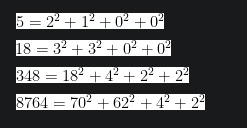

In [64]:
#Algunos ejemplos conocidos de prueba

start = t.time()
a = cuadros(5)
b = cuadros(18)
c = cuadros(348)
d = cuadros(8764)
stop = t.time()

print(a,b,c,d, sep = '\n' )
print(f'Tiempo = {stop - start}s')

[2, 1]
[3, 3]
[18, 4, 2, 2]
[93, 9, 5, 3]
Tiempo = 0.0009801387786865234s
